# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had the most timepoints, which could indicate that these drugs worked effectively for the longest period.
- The chosen population of mice were evenly spread across both genders, which reflects the normal population distribution.
- There is a positive correlation between the original weight of the mouse and the volume of the tumor that they were experiencing
 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_data_df.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
count = combined_data_df[['Mouse ID']].nunique()
print(count)

combined_data_df.dtypes
combined_data_df = combined_data_df.astype({"Tumor Volume (mm3)": int}, errors='raise')
combined_data_df['Tumor Volume (mm3)'].dtype

Mouse ID    249
dtype: int64


dtype('int32')

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count = combined_data_df['Mouse ID'].value_counts()
print(count)

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_duplicates = combined_data_df[combined_data_df.duplicated('Mouse ID')]
combined_data_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45,0,Propriva,Female,21,26
250,a275,5,46,0,Ceftamin,Female,20,28
251,w575,5,48,1,Zoniferol,Female,16,28
252,x822,5,45,1,Ceftamin,Male,3,29
253,l509,5,45,0,Capomulin,Male,17,21


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df.drop_duplicates(subset='Mouse ID', keep='first')
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
count = cleaned_data_df['Mouse ID'].nunique()
print(count)

249


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Create groupby object
grouped_drug_regimen_df = cleaned_data_df.groupby(["Drug Regimen"])
print(grouped_drug_regimen_df)
grouped_drug_regimen_df.count().head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25
Propriva,25,25,25,25,25,25,25
Ramicane,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24


In [13]:
#Create series
avg_drug = grouped_drug_regimen_df["Tumor Volume (mm3)"].mean()
med_drug = grouped_drug_regimen_df["Tumor Volume (mm3)"].median()
var_drug = grouped_drug_regimen_df["Tumor Volume (mm3)"].var()
std_drug = grouped_drug_regimen_df["Tumor Volume (mm3)"].std()
sem_tumor = grouped_drug_regimen_df["Tumor Volume (mm3)"].sem()	



In [14]:

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": avg_drug,
                         "Median Tumor Volume": med_drug,
                         "Tumor Volume Variance": var_drug,
                         "Tumor Volume Std. Dev.": std_drug,
                         "Tumor Volume Std. Err.": sem_tumor})
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = grouped_drug_regimen_df.aggregate()
agg_summary.head()


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

## Bar and Pie Charts

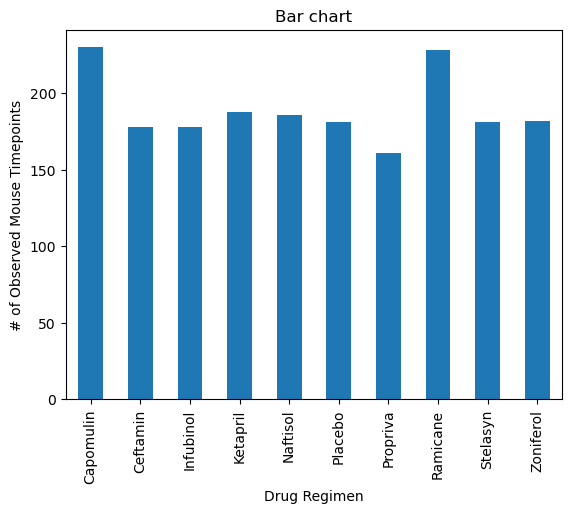

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Drug_regimen = combined_data_df.groupby('Drug Regimen')

Drugs_per_mouse = Drug_regimen['Mouse ID'].count()

# Chart our data, give it a title, and label the axes
Bar_chart = Drugs_per_mouse.plot(kind="bar", title="Bar chart")
Bar_chart.set_xlabel("Drug Regimen")
Bar_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoints')

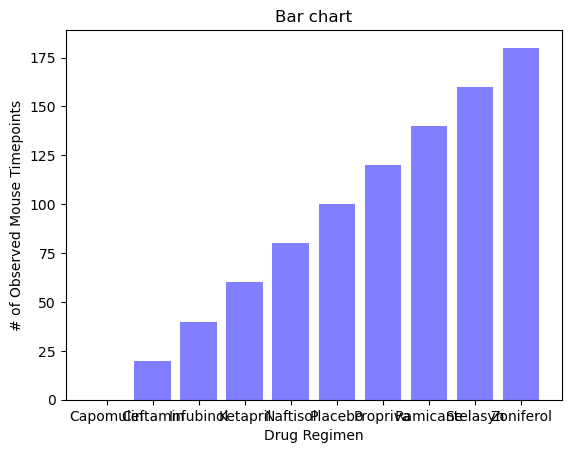

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
observations = [0,20,40,60,80,100,120,140,160,180]
x_axis =np.arange(len(regimen))
plt.bar(x_axis, observations, color ='b', alpha = 0.5, align ='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen)
plt.title('Bar chart')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
          

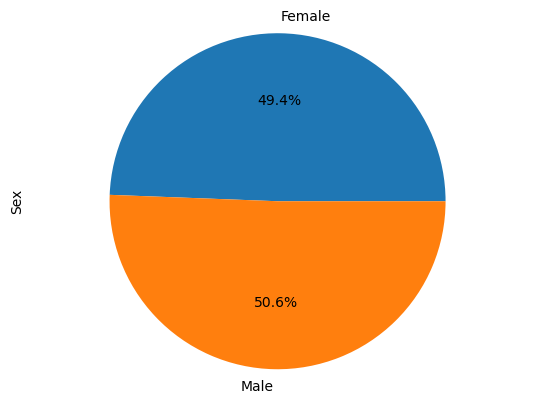

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Sex = combined_data_df.groupby('Sex')

Male_vs_Female = Sex['Mouse ID'].count()
pie_chart = Male_vs_Female.plot(kind="pie", autopct='%1.1f%%', y='Sex')
pie_chart.set_ylabel("Sex")

plt.axis("equal")
plt.show()

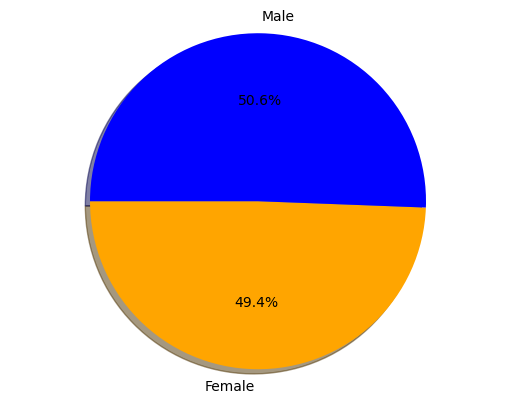

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [122.512,125.488]

# The colours of each section of the pie chart
colours = ["orange", "blue",]
plt.pie(sizes, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  # Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Filter dataset using loc
filtered_data_df = combined_data_df.loc[(combined_data_df["Drug Regimen"] == "Capomulin") | (
    combined_data_df["Drug Regimen"] == "Ramicane") | (
    combined_data_df["Drug Regimen"] == "Infubinol") | (
    combined_data_df["Drug Regimen"] == "Ceftamin"), :]
filtered_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
29,c326,0,45,0,Infubinol,Female,18,25
30,c139,0,45,0,Infubinol,Male,11,28
31,v339,0,45,0,Infubinol,Male,20,26
32,a577,0,45,0,Infubinol,Female,6,25


In [45]:

#Groupby data
max_timepoint = filtered_data_df.loc[filtered_data_df.groupby('Mouse ID')['Timepoint'].transform("max") == filtered_data_df['Timepoint']]
max_timepoint.head()
#Groupby into dataframe
max_timepoint_df = max_timepoint.sum()
max_timepoint_df.head()



Mouse ID              u153b447x226t573c326w678v339m756o813h531l558w1...
Timepoint                                                          3570
Tumor Volume (mm3)                                                 4673
Metastatic Sites                                                    145
Drug Regimen          CeftaminCeftaminCeftaminCeftaminInfubinolRamic...
dtype: object

In [46]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge = pd.merge(max_timepoint_df, combined_data_df, on=["Mouse ID","Timepoint"], how="inner")
combined_data_df.head()

ValueError: Cannot merge a Series without a name

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 

x_axis_timepoints = np.arange(0, 50, 5)
x_axis_timepoints


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

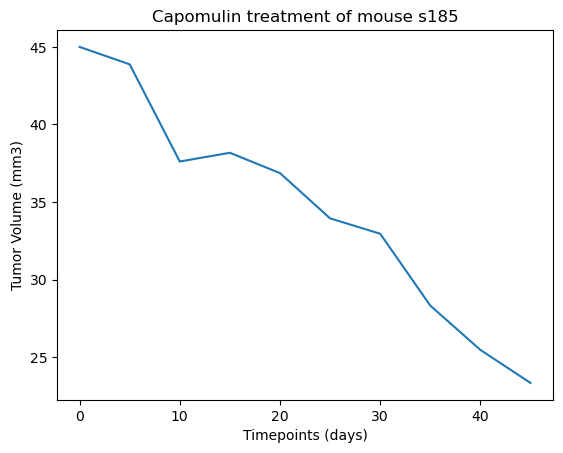

In [66]:
#Tumor volume
tumor_volume = [45.0, 43.87849569, 37.61494768, 38.17723195, 36.86687576, 33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787]

#Plot the graph
plt.plot(x_axis_timepoints, tumor_volume) 
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter data
capomulin_df = filtered_data_df.loc[(filtered_data_df["Drug Regimen"] == "Capomulin")]
capomulin_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
226,j246,0,45,0,Capomulin,Female,21,21
227,r554,0,45,0,Capomulin,Female,8,17
228,s185,0,45,0,Capomulin,Female,3,17
229,b742,0,45,0,Capomulin,Male,7,21


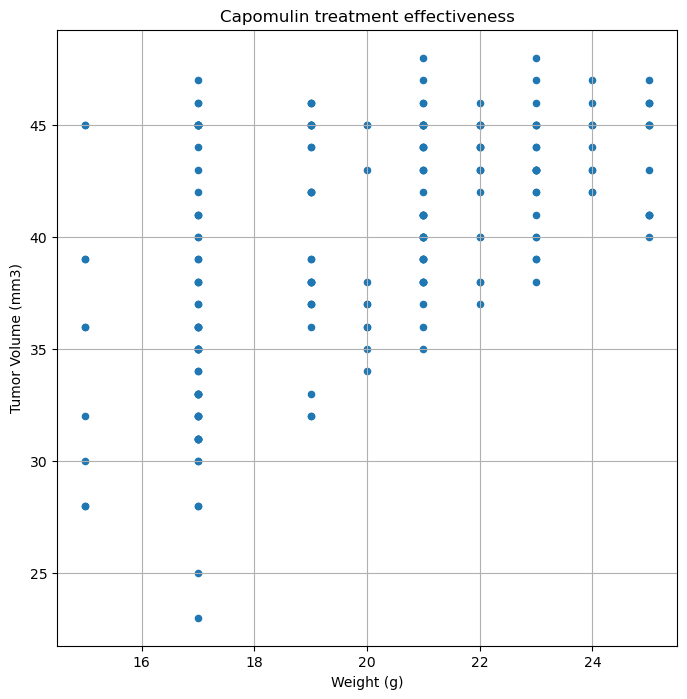

In [48]:
#Convert Tumor column to average per weight
capomulin_df

#Plot the data
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin treatment effectiveness")
plt.show()


## Correlation and Regression

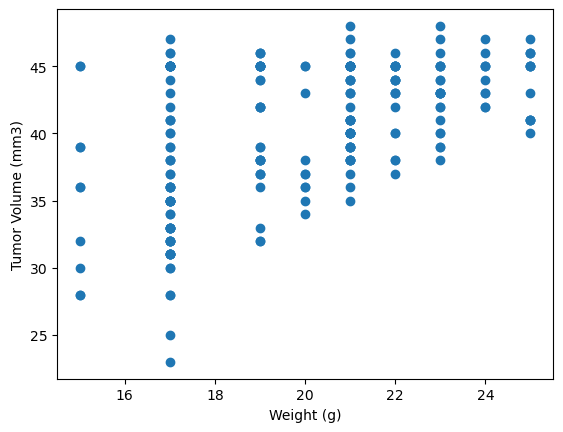

ValueError: x and y must have the same length.

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Plot weight versus tumor volume on a scatterplot
weight = capomulin_df['Weight (g)']
tumor_volume = capomulin_df['Tumor Volume (mm3)']
plt.scatter(weight,tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr('Weight (g)','Tumor Volume (mm3)')[0],2)}")

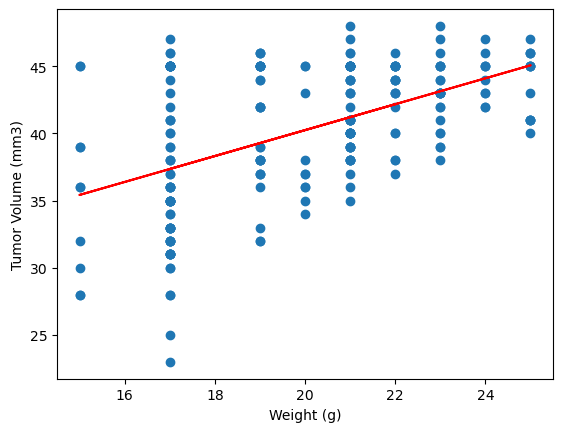

In [55]:
# Add the linear regression equation and line to plot
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()